In [313]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_circles
plt.style.use("ggplot")

In [314]:
def plot_clusters(points, cluster_labels, offset = 0.1, show_annotation=True):
    
    cols = list(map(lambda x: np.where(np.unique(cluster_labels) == x)[0][0], cluster_labels))
    plt.scatter(points[:,0], points[:,1], c=cols)
    
    if not show_annotation:
        return
    #annotations
    for i in range(len(points)):
        plt.annotate(i, (points[i,0]+offset, points[i,1]+offset))
    
    

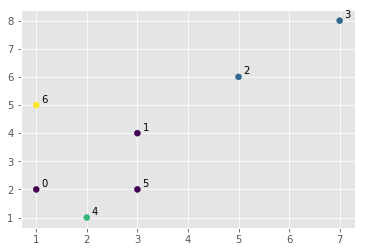

In [315]:
points = np.array([
    (1,2),
    (3,4),
    (5,6),
    (7,8),
    (2,1),
    (3,2),
    (1,5)
])


cluster_labels = ['a','a','c','c','e','a','f']
        
plot_clusters(points, cluster_labels)
plt.show()

In [317]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

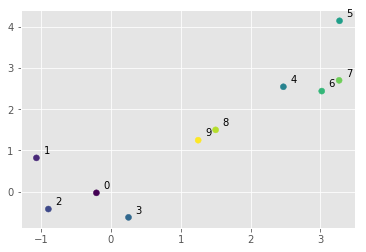

In [318]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))
cluster_labels = range(10)

plot_clusters(points, cluster_labels)
plt.show()

In [319]:
class KMeans(object):
    def __init__(self, points, K, init = []):
        
        self.K = K
        self.points = points

#         self.centers = init_points
#         else:

        if init == []:
            self.centers = np.array([points[i] for i in np.random.choice(range(len(points)), K, replace=False)])
        else:
            self.centers = np.array(init)
        self.means = self.centers.copy()
        
    def assign(self):
        d = euclidean_distances(self.points, self.centers)
        self.clusters = np.argmin(d,1)
    
    def recalculate(self):
        
        means = np.zeros((self.K,2))
        counts = np.zeros(self.K)
        
        for i in range(len(self.points)):
            clus = self.clusters[i]
            means[clus] += (self.points[i])
            counts[clus] += 1
        for i in range(self.K):
            means[i][0] /= counts[i]
            means[i][1] /= counts[i]
            
        self.means = means   
        
    def find_means(self):
        
        self.prev_means = np.zeros((self.K,2))
        self.assign()

        while ((self.means - self.prev_means).any()):
            
            self.prev_means = self.means.copy()
            
            self.assign()
            
            self.recalculate()
            
            self.centers = self.means.copy()
            self.assign()

                
    def plot_clusters(self):
        
        cols = list(map(lambda x: np.where(np.unique(self.clusters) == x)[0][0], self.clusters))
        plt.scatter(self.points[:,0], self.points[:,1], c=cols)
        plt.scatter(self.centers[:,0], self.centers[:,1], marker="x")
#         plt.scatter(init_points[:,0], init_points[:,1])
        
        
            

In [320]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))
cluster_labels = range(10)

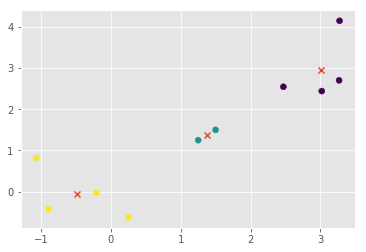

In [321]:
km = KMeans(points, 3)
km.find_means()
km.plot_clusters()

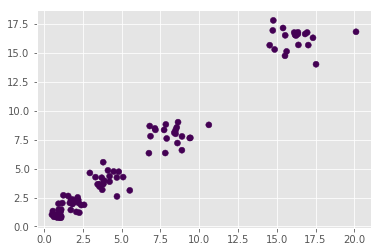

In [305]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

 

points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

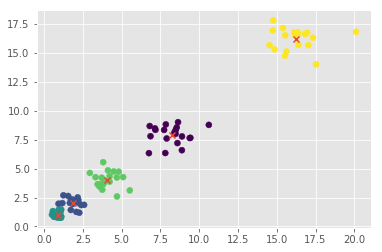

In [306]:
km = KMeans(points, 5)
km.find_means()
km.plot_clusters()

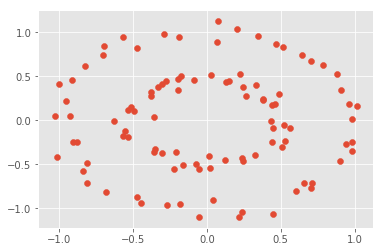

In [307]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
plt.scatter(points[:,0], points[:,1])

## Random Initializations

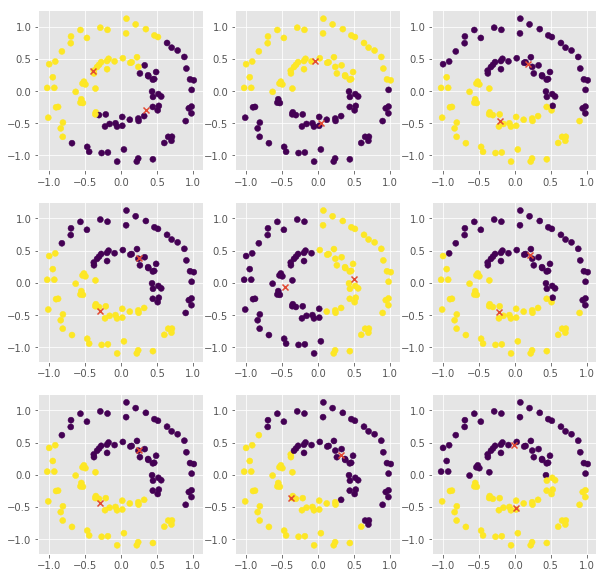

In [308]:
fig = plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    km = KMeans(points, 2)
    km.find_means()
    km.plot_clusters()

(100, 2)


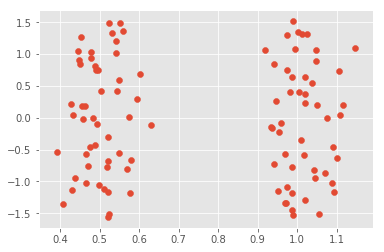

In [311]:
points, _ = make_circles(100, noise=0.06, factor=0.5)

R = np.sqrt(points[:,0]**2 + points[:,1]**2)
theta = np.arctan(points[:,1]/points[:,0])

points = np.array([R,theta]).T
print(points.shape)
plt.scatter(R, theta)

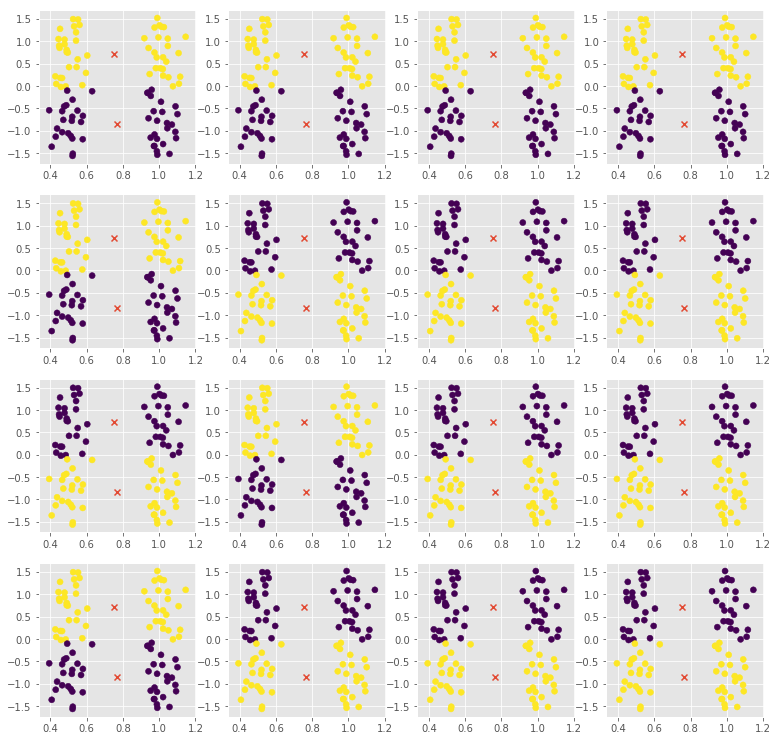

In [312]:
fig = plt.figure(figsize=(13,13))

for i in range(16):
    plt.subplot(4,4,i+1)
    
#     init_points = np.array([[0.5,0.5], [1.0,-0.5]])
    km = KMeans(points, 2)
    km.find_means()
    km.plot_clusters()